<h1 style='color:red' align='center'>Task 4: Sales Prediction</h1>

## Import Libraries and Load Dataset

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset, using the first column as the index (even if it has no name)
data = pd.read_csv("C:/Users/pc/Desktop/Internship @CodeAlpha/Task4/Advertising.csv", index_col=0)

# Display basic information about the dataset
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Here’s what each column typically represents in this well-known advertising dataset:

1. **TV**:  
   The amount of money (often in thousands of dollars) spent on TV advertising for a given market or campaign.

2. **Radio**:  
   The amount of money (often in thousands of dollars) spent on radio advertising.

3. **Newspaper**:  
   The amount of money (often in thousands of dollars) spent on newspaper advertising.

4. **Sales**:  
   The resulting sales (often in thousands of units or thousands of dollars) generated in that market or campaign.

Each row in the dataset usually corresponds to a different market or sales region, showing how much was spent on each advertising medium and what the resulting sales were.

In [13]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [32]:
print("\nStatistical Summary:")
data.describe()


Statistical Summary:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Visualizations

### 1. Histograms for each variable

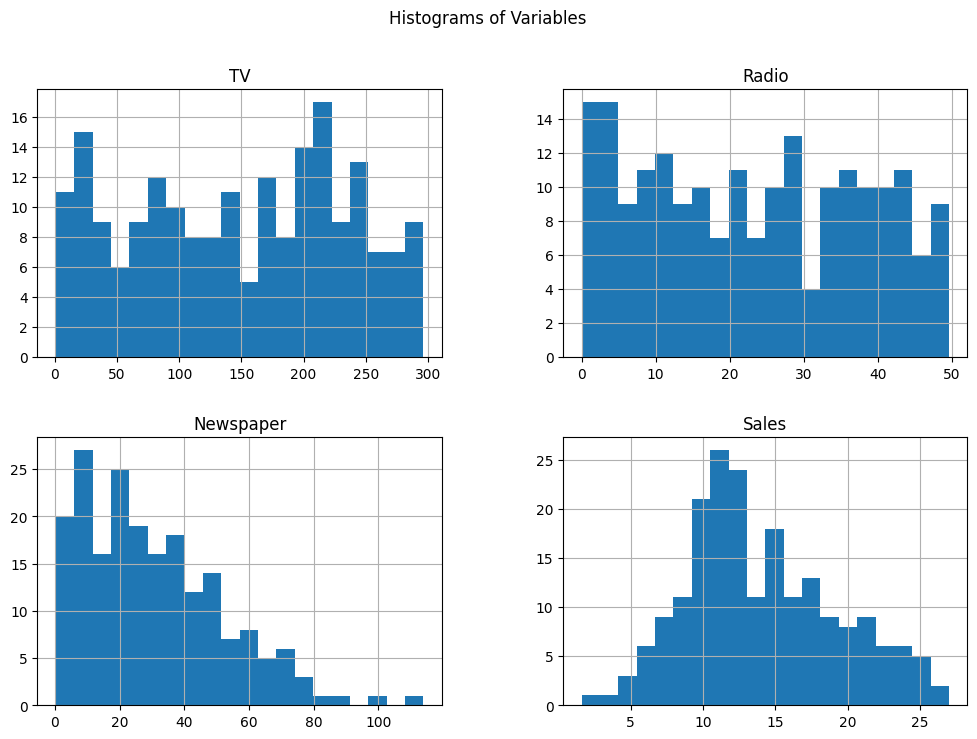

In [33]:
data.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Variables")
plt.show()


### 2. Boxplots to identify outliers for each variable

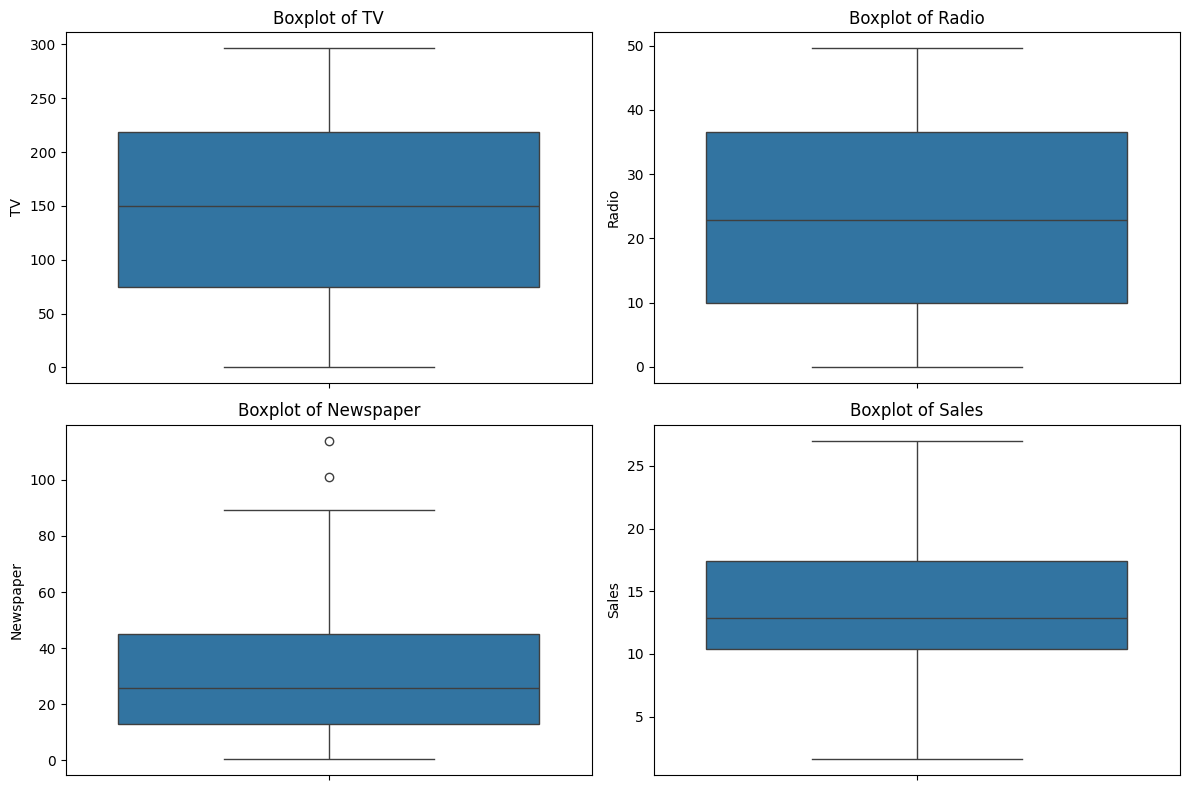

In [16]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### 3. Pairplot to view pairwise relationships between variables

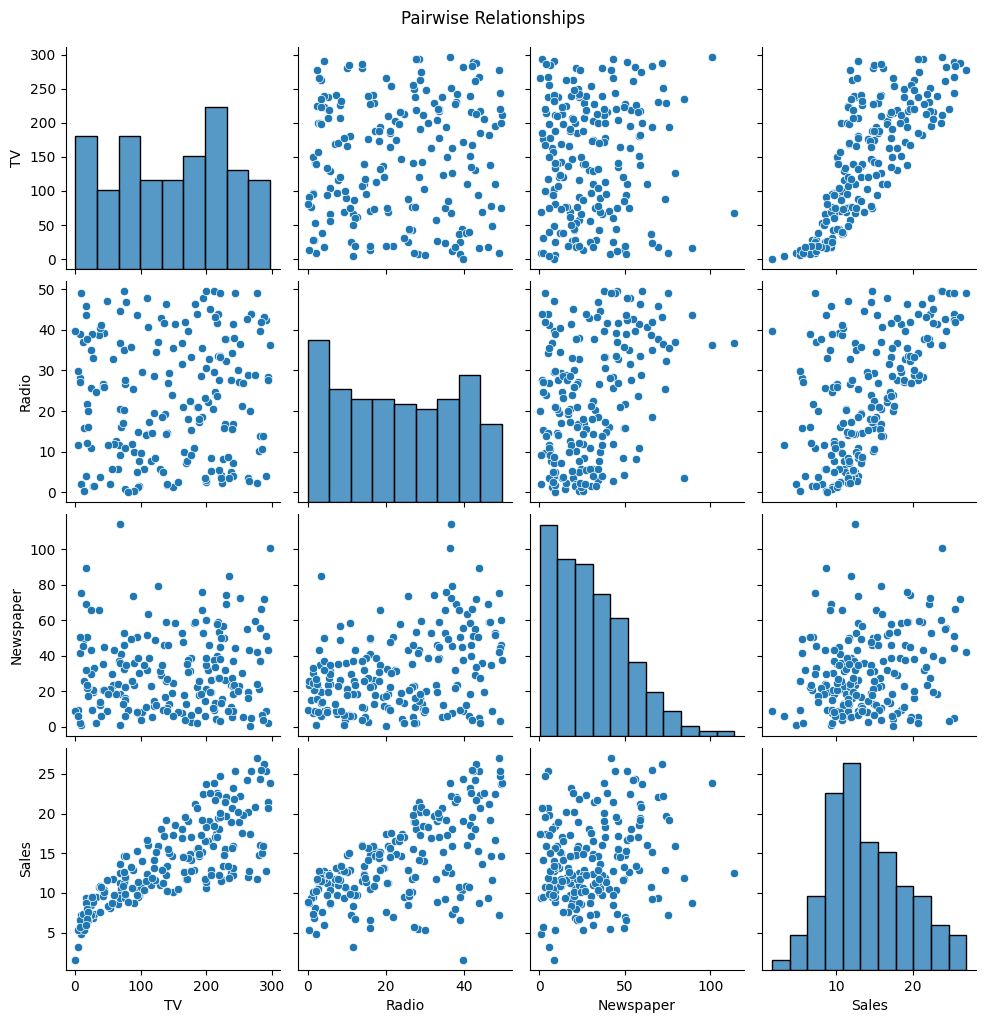

In [17]:
sns.pairplot(data)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

### 4. Heatmap to visualize the correlation matrix

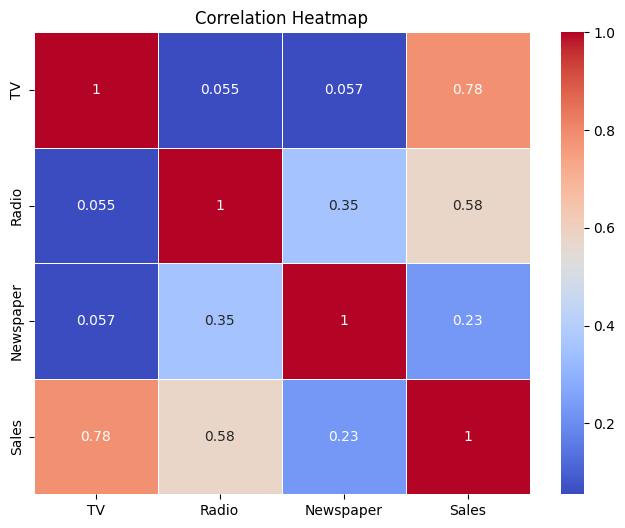

In [18]:
plt.figure(figsize=(8, 6))
corr = data.corr() #This line computes the correlation coefficients(Pearson) between each pair of numeric columns in your DataFrame named data.
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Model Training and Prediction

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load data (assuming `data` is already defined)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and hyperparameter grids
models = {
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(objective='reg:squarederror'),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    }
}

# Perform GridSearchCV for each model
best_models = {}

for name, m in models.items():
    print(f"🔍 Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(m['model'], m['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
    print(f"✅ {name} best R² score: {grid_search.best_score_:.4f}")


# Ensure at least one model is available
if not best_models:
    raise ValueError("❌ No models were successfully trained. Check data and hyperparameters.")

# Select the best model based on highest R² score
best_model_name = max(best_models, key=lambda x: best_models[x]['best_score'])
best_model = best_models[best_model_name]['best_estimator']

# Predict sales using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display Results
print("\n🏆 Best Model:", best_model_name)
print("📊 Best Hyperparameters:", best_models[best_model_name]['best_params'])
print("\n📈 Model Evaluation:")
print("✔️ Mean Squared Error:", mse)
print("✔️ R-squared:", r2)

🔍 Tuning hyperparameters for DecisionTree...
✅ DecisionTree best R² score: 0.9396
🔍 Tuning hyperparameters for RandomForest...
✅ RandomForest best R² score: 0.9728
🔍 Tuning hyperparameters for SVM...
✅ SVM best R² score: 0.9786
🔍 Tuning hyperparameters for GradientBoosting...
✅ GradientBoosting best R² score: 0.9699
🔍 Tuning hyperparameters for Lasso...
✅ Lasso best R² score: 0.8617
🔍 Tuning hyperparameters for Ridge...
✅ Ridge best R² score: 0.8595
🔍 Tuning hyperparameters for XGBoost...
✅ XGBoost best R² score: 0.9699

🏆 Best Model: SVM
📊 Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}

📈 Model Evaluation:
✔️ Mean Squared Error: 0.3617274938084017
✔️ R-squared: 0.9885397240671177


## Model Evaluation Visualizations

### 1. Actual vs. Predicted Sales Plot

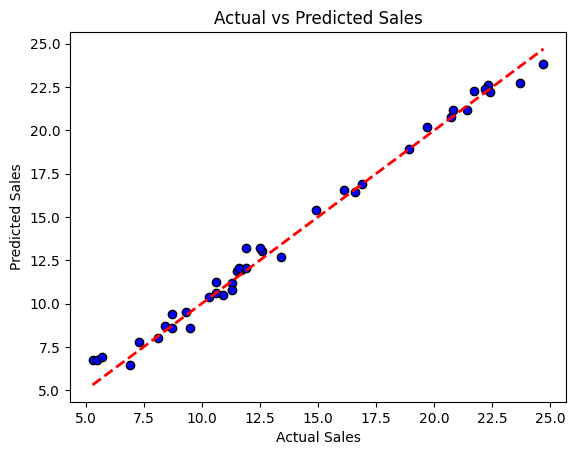

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

### 2. Distribution of Residuals

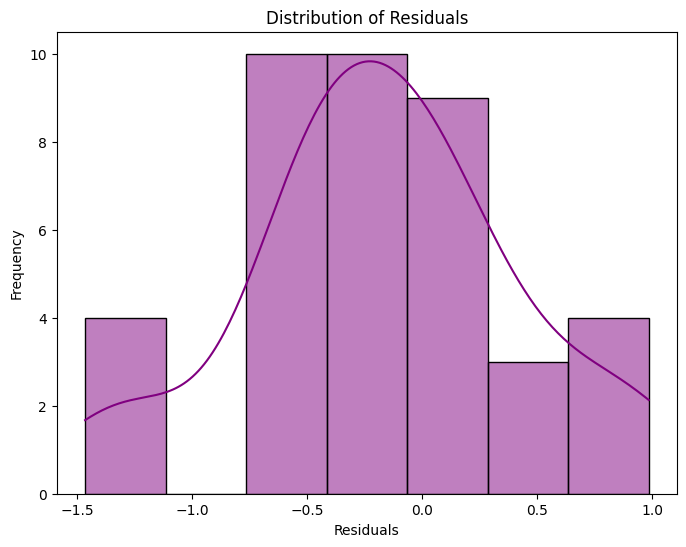

In [56]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### 3. Residuals vs. Predicted Sales Plot

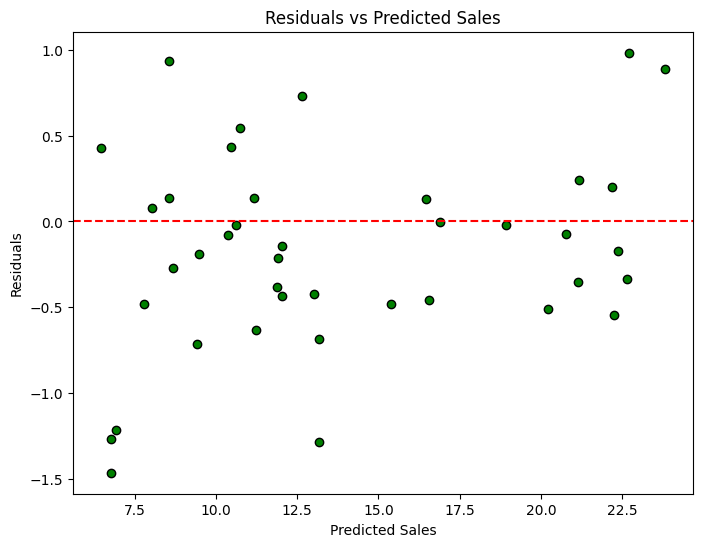

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', edgecolor='k')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.show()

In [95]:
data[data.Sales>26].mean()

TV           282.25
Radio         45.95
Newspaper     56.80
Sales         26.60
dtype: float64

In [100]:
new_data = pd.DataFrame([[283, 46, 56]], columns=['TV', 'Radio', 'Newspaper'])
prediction = best_model.predict(new_data)
print(prediction)

[25.91007275]


<h1 style='color:red' align='center'>THE END</h1>